# Diabetic_Retinopathy

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
# change the trees

## Loading Data

In [48]:
Datset = arff.loadarff("Classification_Datasets/1_Diabetic_Retinopathy/Diabetic_Retinopathy.arff") 


In [49]:
df = pd.DataFrame(Datset[0])
df.head()

0    1     2     3     4     5     6     7          8          9  \
0  1.0  1.0  22.0  22.0  22.0  19.0  18.0  14.0  49.895756  17.775994   
1  1.0  1.0  24.0  24.0  22.0  18.0  16.0  13.0  57.709936  23.799994   
2  1.0  1.0  62.0  60.0  59.0  54.0  47.0  33.0  55.831441  27.993933   
3  1.0  1.0  55.0  53.0  53.0  50.0  43.0  31.0  40.467228  18.445954   
4  1.0  1.0  44.0  44.0  44.0  41.0  39.0  27.0  18.026254   8.570709   

          10        11        12        13        14        15        16  \
0   5.270920  0.771761  0.018632  0.006864  0.003923  0.003923  0.486903   
1   3.325423  0.234185  0.003903  0.003903  0.003903  0.003903  0.520908   
2  12.687485  4.852282  1.393889  0.373252  0.041817  0.007744  0.530904   
3   9.118901  3.079428  0.840261  0.272434  0.007653  0.001531  0.483284   
4   0.410381  0.000000  0.000000  0.000000  0.000000  0.000000  0.475935   

         17   18 Class  
0  0.100025  1.0  b'0'  
1  0.144414  0.0  b'0'  
2  0.128548  0.0  b'1'  
3  0.114790  0.0  b'0'  
4  0.123572  0.0  b'1'

## Data preparation and Analysis

In [50]:
print(np.count_nonzero(Datset==np.nan))

0


In [51]:
frequency = df['Class'].value_counts()
print(frequency)
print("-------")

b'1'    611
b'0'    540
Name: Class, dtype: int64
-------


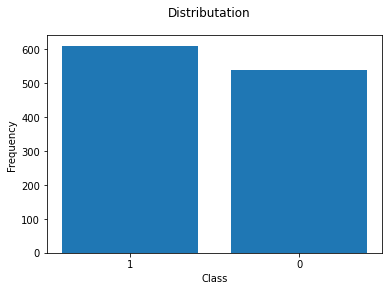

In [52]:
plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.bar( ("1","0"), frequency)
plt.suptitle("Distributation")
plt.show()

ok


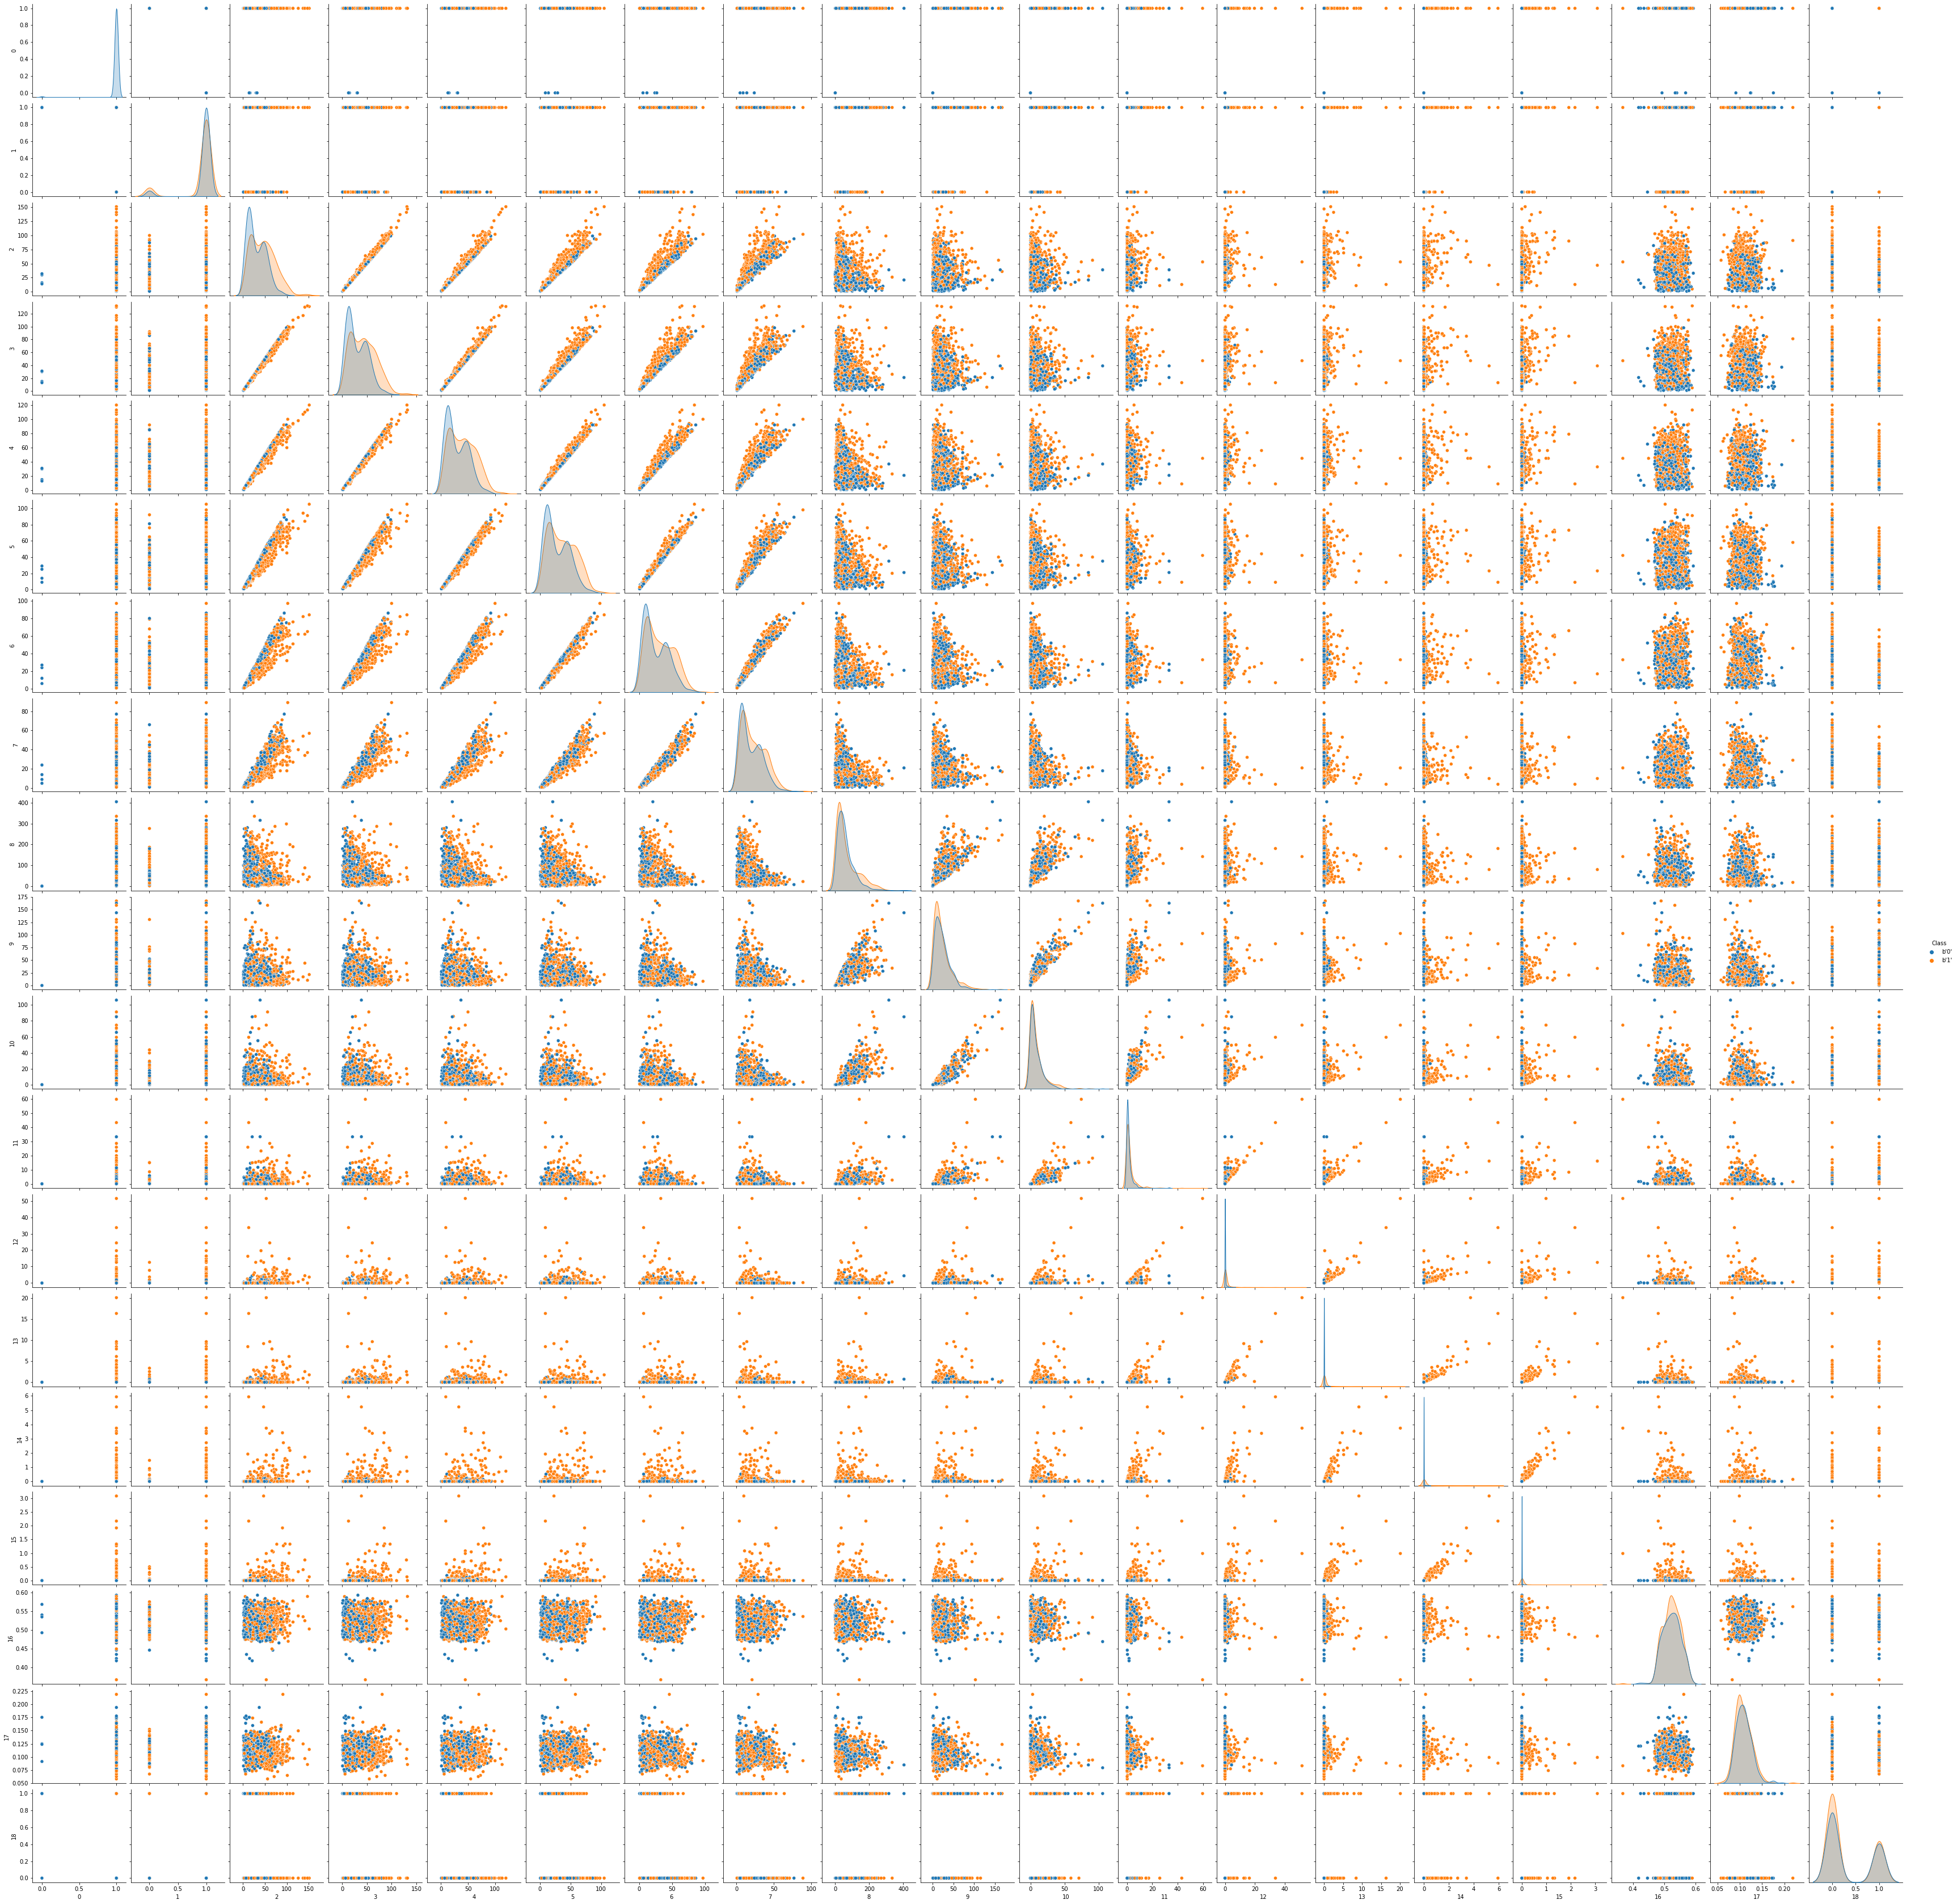

In [93]:
sns.pairplot(df, hue="Class")
print("ok")

<AxesSubplot:>

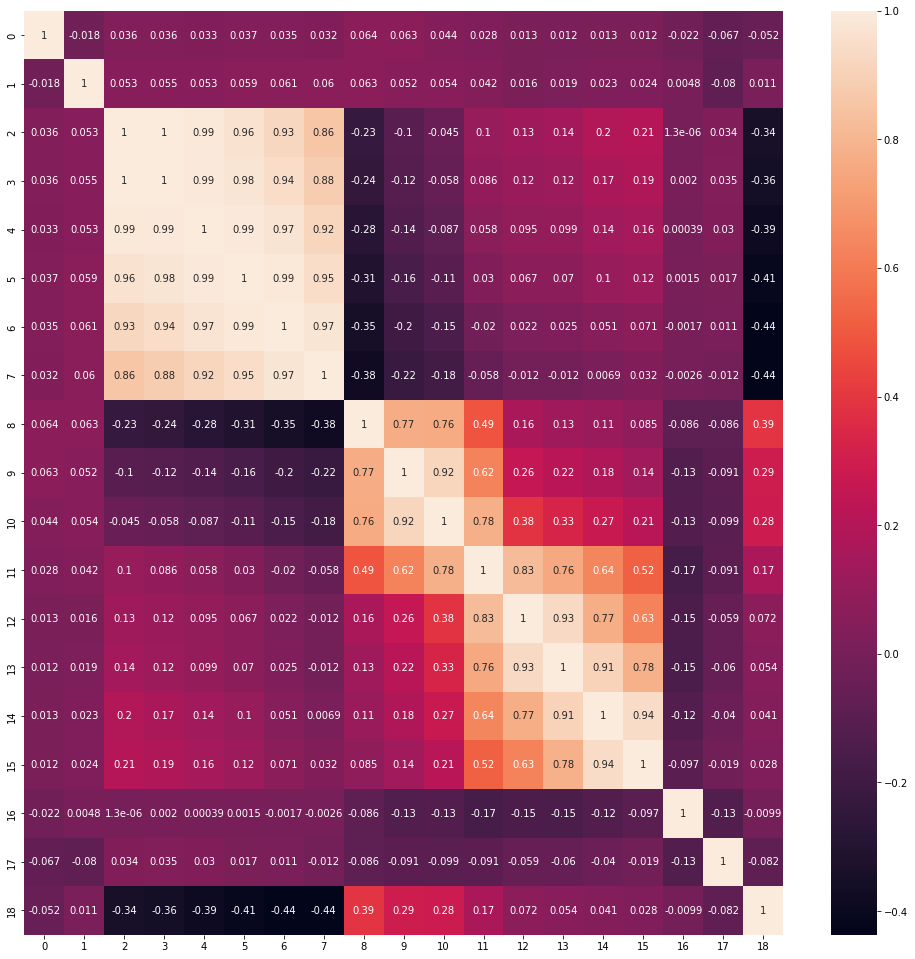

In [94]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot =True)

### Defining Dictionary of Models

In [55]:
MODELS = {'logistic_r', 'svc', 'tree', 'forest', 'knn', 'adaboost', 'gnb', 'nn'}
diabetic_retinopathy_dict = {}    

## Train and Test set

In [56]:
x = df.iloc[:,:-1]
y = df.Class.apply(lambda x: pd.to_numeric(str(x)[2]))

In [57]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [58]:
StScale = StandardScaler()
X_train = StScale.fit_transform(X_train)
X_test = StScale.transform(X_test)

In [59]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']

    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])

    prediction = curr_model.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    weighted_f1 = f1_score(y_test, prediction, average='weighted')
    macro_f1 = f1_score(y_test, prediction, average='macro')
    
    table.append(['Mean Squared Error', mse])
    table.append(['Accuracy',accuracy])
    table.append(['weighted_f1', weighted_f1])
    table.append(['macro_f1',macro_f1])

    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    return prediction

## 1. LogisticRegression for Classification

In [60]:
logistic_r = LogisticRegression(random_state=0)
logistic_r.fit(X_train, y_train)

LogisticRegression(random_state=0)

## LogisticRegression Analysis

In [61]:
diabetic_retinopathy_dict['logistic_r'] = {'model':logistic_r, 'hyperparameters':0}
lr_prediction = model_results(diabetic_retinopathy_dict['logistic_r'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| Mean Squared Error     | 0.285714 |
+------------------------+----------+
| Accuracy               | 0.714286 |
+------------------------+----------+
| weighted_f1            | 0.713375 |
+------------------------+----------+
| macro_f1               | 0.714152 |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.63      0.84      0.72       101
           1       0.83      0.62      0.71       130

    accuracy                           0.71       231
   macro avg       0.73      0.73      0.71       231
weighted avg       0.74      0.71      0.71       231

[[85 16]
 [50 80]]


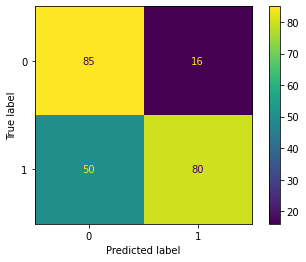

In [62]:
print(classification_report(y_test, lr_prediction))
print(confusion_matrix (y_test, lr_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, lr_prediction);

## 2. Support vector classification

In [63]:
svc = SVC().fit(X_train, y_train)

In [64]:
parameters = {
    'C':[0.1,0.01, 0.001, 0.5,0.7,1,10,50, 100,150,170,180,190, 200,220, 250,300,1000],
    'gamma': ['scale','auto',0.1, 0.01,0.02, 0.05, 0.03, 0.07, 0.001, 0.009, 0.008],
}
svc_model = RandomizedSearchCV(svc, parameters, verbose=10, random_state=0).fit(X_train, y_train)
svc_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 1/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.527 total time=   0.1s
[CV 2/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 2/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.522 total time=   0.1s
[CV 3/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 3/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.522 total time=   0.2s
[CV 4/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 4/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.522 total time=   0.1s
[CV 5/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 5/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.522 total time=   0.1s
[CV 1/5; 2/10] START C=250, gamma=0.01..........................................
[CV 1/5; 2/10] END ...........C=250, gamma=0.01;

{'gamma': 0.008, 'C': 250}

In [65]:
svc_model.best_estimator_

SVC(C=250, gamma=0.008)

## Support vector classification Analysis

In [66]:
diabetic_retinopathy_dict['svc'] = {'model':svc_model, 'hyperparameters':1}
svc_prediction = model_results(diabetic_retinopathy_dict['svc'])

+------------------------+------------+
| Parameters / Metrics   |      Tuned |
+========================+============+
| gamma                  |   0.008    |
+------------------------+------------+
| C                      | 250        |
+------------------------+------------+
| Mean Squared Error     |   0.268398 |
+------------------------+------------+
| Accuracy               |   0.731602 |
+------------------------+------------+
| weighted_f1            |   0.732206 |
+------------------------+------------+
| macro_f1               |   0.731476 |
+------------------------+------------+


              precision    recall  f1-score   support

           0       0.66      0.81      0.73       101
           1       0.82      0.67      0.74       130

    accuracy                           0.73       231
   macro avg       0.74      0.74      0.73       231
weighted avg       0.75      0.73      0.73       231

[[82 19]
 [43 87]]


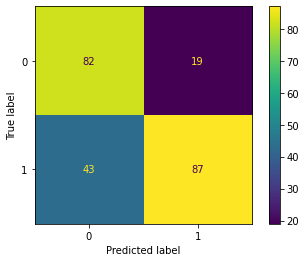

In [67]:
print(classification_report(y_test, svc_prediction))
print(confusion_matrix (y_test, svc_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, svc_prediction);

## Decision tree

In [68]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [69]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 55.88135039273247, 'min_samples_split': 0.7151893663724195}

## Decision tree Analysis

In [70]:
diabetic_retinopathy_dict['tree'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(diabetic_retinopathy_dict['tree'])

+------------------------+-----------+
| Parameters / Metrics   |     Tuned |
+========================+===========+
| max_depth              | 55.8814   |
+------------------------+-----------+
| min_samples_split      |  0.715189 |
+------------------------+-----------+
| Mean Squared Error     |  0.380952 |
+------------------------+-----------+
| Accuracy               |  0.619048 |
+------------------------+-----------+
| weighted_f1            |  0.606847 |
+------------------------+-----------+
| macro_f1               |  0.612947 |
+------------------------+-----------+


              precision    recall  f1-score   support

           0       0.54      0.85      0.66       101
           1       0.79      0.44      0.56       130

    accuracy                           0.62       231
   macro avg       0.67      0.64      0.61       231
weighted avg       0.68      0.62      0.61       231

[[86 15]
 [73 57]]


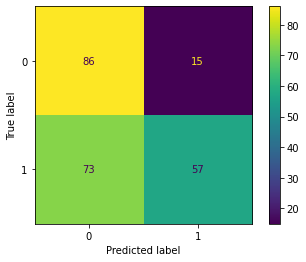

In [71]:
print(classification_report(y_test, tree_prediction))
print(confusion_matrix (y_test, tree_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, tree_prediction);

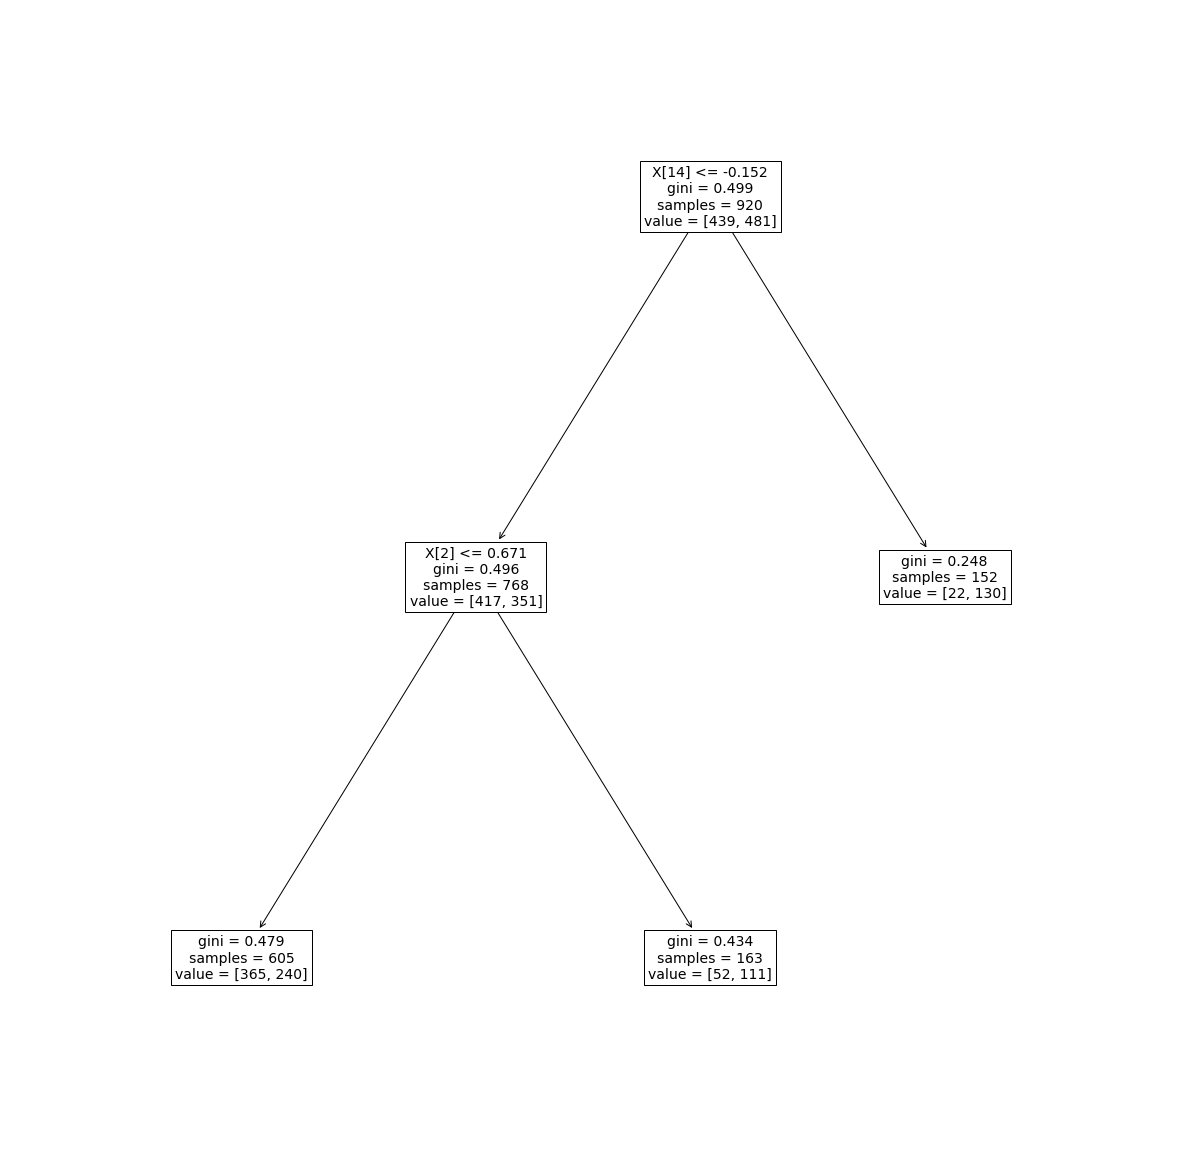

In [72]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest

In [73]:
forest = RandomForestClassifier(class_weight='balanced')
forest = forest.fit(X_train, y_train)

In [74]:
parameters = {
    'n_estimators': range(100,150),
    'max_depth': scipy.stats.uniform(1, 100),
}
forest_model = RandomizedSearchCV(forest, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 30.753460654447228, 'n_estimators': 124}

In [75]:
diabetic_retinopathy_dict['random_forest_r'] = {'model':forest_model, 'hyperparameters':1}
forest_prediction = model_results(diabetic_retinopathy_dict['random_forest_r'])

+------------------------+------------+
| Parameters / Metrics   |      Tuned |
+========================+============+
| max_depth              |  30.7535   |
+------------------------+------------+
| n_estimators           | 124        |
+------------------------+------------+
| Mean Squared Error     |   0.350649 |
+------------------------+------------+
| Accuracy               |   0.649351 |
+------------------------+------------+
| weighted_f1            |   0.650456 |
+------------------------+------------+
| macro_f1               |   0.64893  |
+------------------------+------------+


## 5. K-nearest neighbours


Fitting and hyperparameter search

In [76]:
from sklearn import neighbors
import sklearn
import scipy

knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

In [77]:
param_distribution = {'n_neighbors': range(1, 150), 'weights':['uniform', 'distance'], 'leaf_size': scipy.stats.uniform(1, 50)}
knn_randomized = sklearn.model_selection.RandomizedSearchCV(knn, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)

print('best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
best Hyperparameters = {'leaf_size': 34.943976505948015, 'n_neighbors': 33, 'weights': 'distance'}


In [78]:
diabetic_retinopathy_dict["knn"] = {"model":knn_randomized, "hyperparameters":1}
knn_prediction = model_results(diabetic_retinopathy_dict['knn'])

+------------------------+---------------------+
| Parameters / Metrics   | Tuned               |
+========================+=====================+
| leaf_size              | 34.943976505948015  |
+------------------------+---------------------+
| n_neighbors            | 33                  |
+------------------------+---------------------+
| weights                | distance            |
+------------------------+---------------------+
| Mean Squared Error     | 0.36796536796536794 |
+------------------------+---------------------+
| Accuracy               | 0.6320346320346321  |
+------------------------+---------------------+
| weighted_f1            | 0.6299910320399279  |
+------------------------+---------------------+
| macro_f1               | 0.6315927725763176  |
+------------------------+---------------------+


              precision    recall  f1-score   support

           0       0.56      0.76      0.64       101
           1       0.74      0.53      0.62       130

    accuracy                           0.63       231
   macro avg       0.65      0.65      0.63       231
weighted avg       0.66      0.63      0.63       231

[[77 24]
 [61 69]]


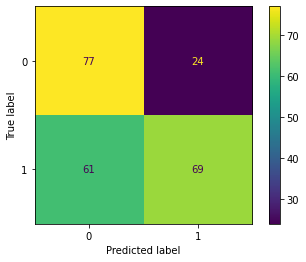

In [79]:
print(classification_report(y_test, knn_prediction))
print(confusion_matrix (y_test, knn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, knn_prediction);

## 6. AdaBoost Classification

Fitting and Hyperparameter search 

In [80]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier().fit(X_train,y_train)

In [81]:
param_distribution = {'n_estimators': range(1, 250), 'learning_rate': scipy.stats.uniform(.1, 5)}
adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=5, n_iter=50).fit(X_train, y_train)

print('Best Hyperparameters = ' + str(adaBoost_randomized.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters = {'learning_rate': 0.8948479182275986, 'n_estimators': 142}


In [82]:
diabetic_retinopathy_dict["adaboost"] = {"model":adaBoost_randomized, "hyperparameters":1}
adaboost_prediction = model_results(diabetic_retinopathy_dict['adaboost'])

+------------------------+------------+
| Parameters / Metrics   |      Tuned |
+========================+============+
| learning_rate          |   0.894848 |
+------------------------+------------+
| n_estimators           | 142        |
+------------------------+------------+
| Mean Squared Error     |   0.294372 |
+------------------------+------------+
| Accuracy               |   0.705628 |
+------------------------+------------+
| weighted_f1            |   0.706478 |
+------------------------+------------+
| macro_f1               |   0.705357 |
+------------------------+------------+


              precision    recall  f1-score   support

           0       0.63      0.77      0.70       101
           1       0.79      0.65      0.71       130

    accuracy                           0.71       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.72      0.71      0.71       231

[[78 23]
 [45 85]]


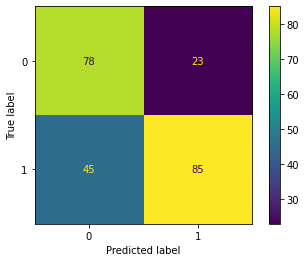

In [83]:
print(classification_report(y_test, adaboost_prediction))
print(confusion_matrix (y_test, adaboost_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_prediction);

## 7. Gaussian Naive Bayes classification

In [84]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB().fit(X_train, y_train)

In [85]:
# param_distribution = {'n_estimators': range(1, 150), 'learning_rate': scipy.stats.reciprocal(1, 5)}
# adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=3, n_iter=250).fit(X_train, y_train)
# print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

In [86]:
diabetic_retinopathy_dict["gnb"] = {"model":naive_bayes, "hyperparameters":0}
naive_bayes_prediction = model_results(diabetic_retinopathy_dict['gnb'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| Mean Squared Error     | 0.393939 |
+------------------------+----------+
| Accuracy               | 0.606061 |
+------------------------+----------+
| weighted_f1            | 0.607531 |
+------------------------+----------+
| macro_f1               | 0.603654 |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.54      0.60      0.57       101
           1       0.66      0.61      0.63       130

    accuracy                           0.61       231
   macro avg       0.60      0.61      0.60       231
weighted avg       0.61      0.61      0.61       231

[[61 40]
 [51 79]]


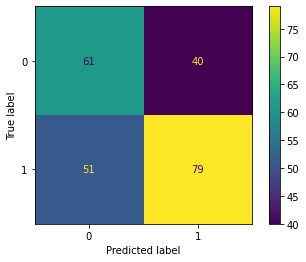

In [87]:
print(classification_report(y_test, naive_bayes_prediction))
print(confusion_matrix (y_test, naive_bayes_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, naive_bayes_prediction);

## 8. Neural Network classification

In [88]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=900)

In [89]:
param_distribution = {'max_iter': range(1000, 1500),
                        'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                        'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Hyperparameters = {'leaf_size': 34.943976505948015, 'n_neighbors': 33, 'weights': 'distance'}


In [90]:
diabetic_retinopathy_dict["nn"] = {"model":mlp_randomized, "hyperparameters":1}
nn_prediction = model_results(diabetic_retinopathy_dict['nn'])

+------------------------+----------------------+
| Parameters / Metrics   | Tuned                |
+========================+======================+
| alpha                  | 0.008864876884973134 |
+------------------------+----------------------+
| learning_rate          | constant             |
+------------------------+----------------------+
| max_iter               | 1290                 |
+------------------------+----------------------+
| Mean Squared Error     | 0.2554112554112554   |
+------------------------+----------------------+
| Accuracy               | 0.7445887445887446   |
+------------------------+----------------------+
| weighted_f1            | 0.7437570251476965   |
+------------------------+----------------------+
| macro_f1               | 0.7389330523896178   |
+------------------------+----------------------+


              precision    recall  f1-score   support

           0       0.72      0.68      0.70       101
           1       0.76      0.79      0.78       130

    accuracy                           0.74       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.74      0.74      0.74       231

[[ 69  32]
 [ 27 103]]


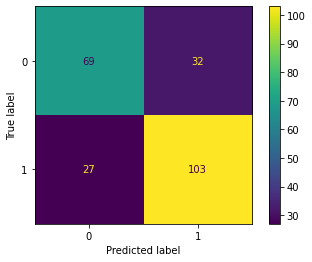

In [91]:
print(classification_report(y_test, nn_prediction))
print(confusion_matrix (y_test, nn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, nn_prediction);

In [92]:
import pickle
with open('base_classification_dict.dictionary', 'rb') as config_dictionary_file:
    base_classification_dict = pickle.load(config_dictionary_file)

base_classification_dict['diabetic_retinopathy_dict']= diabetic_retinopathy_dict

with open('base_classification_dict.dictionary', 'wb') as config_dictionary_file:
    pickle.dump(base_classification_dict, config_dictionary_file)